# Ford GoBike System Data Findings in 2019.

## Investigation Overview
The overall goals of this presentation is to show the following:
- What is the day,season and period through the day with higher number of trips through the year? 
- How the weekend days affected the number of trpis through the year?
- What is the average trip time consumed by the user through the whole year?
- What are the stations that usually the users use through the year as start or end station?
- What are the distribution of the user types?
- How the user type affected the duration of trip ?
- How the season,month,period of day and also the weekend affected the duration of the trip?
- What is the relation between weekend and user type ?
- What is the relation between user type and (season and period of day)?
- How the user type , time analysis and duration of trip can be related?

## Dataset Overview
- Our data contains **2262979 records for 16 columns** downloaded from this link :   https://s3.amazonaws.com/baywheels-data/index.html 
- Ford GoBike has become one of the most popular bike sharing facilitator present in USA.
gained popularity as one of the best bike sharing facilitator present in the United States. 
In this report we would focus on the customer behaviour in 2019 year which would help us understand the customer trends and needs. We would also be seeing the duration of trips,months trends and many other essential targets such as the start and end stations to build a better intuition about the data. 


## Import libraries and declare important variable

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob
from matplotlib import rcParams
from datetime import datetime

%matplotlib inline

In [5]:
df_bikes = pd.read_csv('Bike_2019_Dataset',index_col=[0])
df_bikes.head(3)

c:\users\kiro\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


start_time                 end_time  start_station_id  \
0  2019-01-31 17:57:44.613  2019-02-01 16:24:49.864               229   
1  2019-01-31 20:58:33.886  2019-02-01 15:16:54.173                 4   
2  2019-01-31 18:06:52.924  2019-02-01 11:30:46.530               245   

            start_station_name  end_station_id         end_station_name  \
0    Foothill Blvd at 42nd Ave             196  Grand Ave at Perkins St   
1  Cyril Magnin St at Ellis St             134   Valencia St at 24th St   
2       Downtown Berkeley BART             157     65th St at Hollis St   

   bike_id   user_type bike_share_for_all_trip  duration_min  duration_hrs  \
0     4861  Subscriber                      No   1347.083333     22.451389   
1     5506  Subscriber                      No   1098.333333     18.305556   
2     2717    Customer                      No   1043.883333     17.398056   

  Trip Month  Trip Day Period in day  Season      Weekend  
0    January  Thursday     Afternoon  Winter  Not Weekend  
1    January  Thursday       Evening  Winter  Not Weekend  
2    January  Thursday     Afternoon  Winter  Not Weekend

In [ ]:
df_bikes.info()

### What is the day,season and period through the day with higher number of trips through the year?

In [6]:
def uni_categ_plot(col_name,var_count,sort=True):
    col_distro=df_bikes.loc[:,col_name].value_counts(sort=sort)
    sns.countplot(data=df_bikes,x=df_bikes.loc[:,col_name],color=sns.color_palette()[0],order=col_distro.index)
    plt.xticks(rotation=50);
    for i in range(var_count):
        plt.text(i,col_distro[i]+2150,str(col_distro[i]),ha='center',color='red')

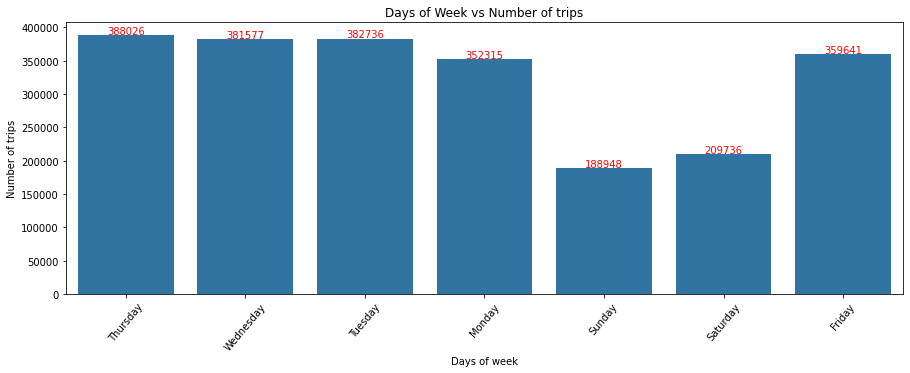

In [8]:
plt.figure(figsize=[15,5])
uni_categ_plot('Trip Day',7,sort=False);
plt.xlabel('Days of week');
plt.ylabel('Number of trips');
plt.title('Days of Week vs Number of trips');

- The plot mainly shows how enormously the weekends affect the number of trips not only in the normal weekends days , but also the day before and after them like in Friday and Monday which has the least number of trips after the weekends days.
- The reason behind that could be that the employees uses the bikes during their trips to or from the offices and finally after a long week , they decided to change the routine in the weekends 

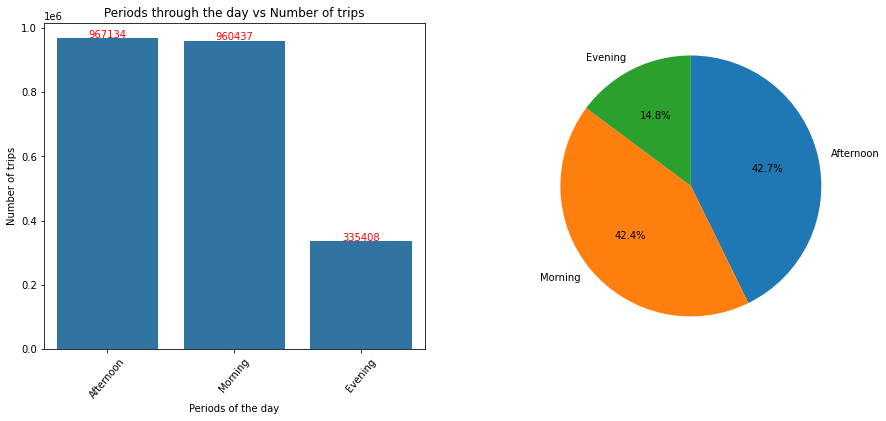

In [19]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
uni_categ_plot('Period in day',3,sort=True);
plt.xlabel('Periods of the day');
plt.ylabel('Number of trips');
plt.title('Periods through the day vs Number of trips');
plt.subplot(1,2,2)
plt.pie(x=df_bikes['Period in day'].value_counts(),labels=df_bikes['Period in day'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- As shown in the plot in previous slide that afternoon and the morning are the dominant periods through the day with a huge drop
of the precentage of the evening period which may be due to that most people went to their offices in the morning and also uses them to get back to home

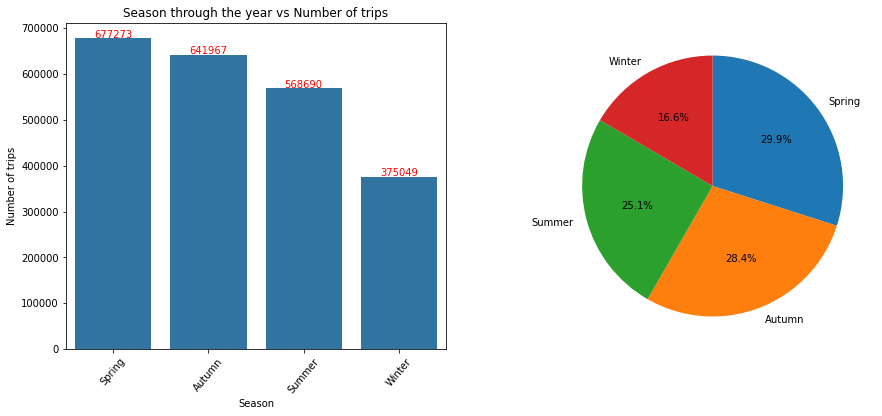

In [20]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
uni_categ_plot('Season',4,sort=True);
plt.xlabel('Season');
plt.ylabel('Number of trips');
plt.title('Season through the year vs Number of trips');
plt.subplot(1,2,2)
plt.pie(x=df_bikes['Season'].value_counts(),labels=df_bikes['Season'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- The plot shows that the seasons with mild weather such as Spring and Automn affect a lot the number of trips 
after that comes the Summer which may be considered also has a better weather rather than winter where rains and snow talks place.

### How the weekend days affected the number of trpis through the year?

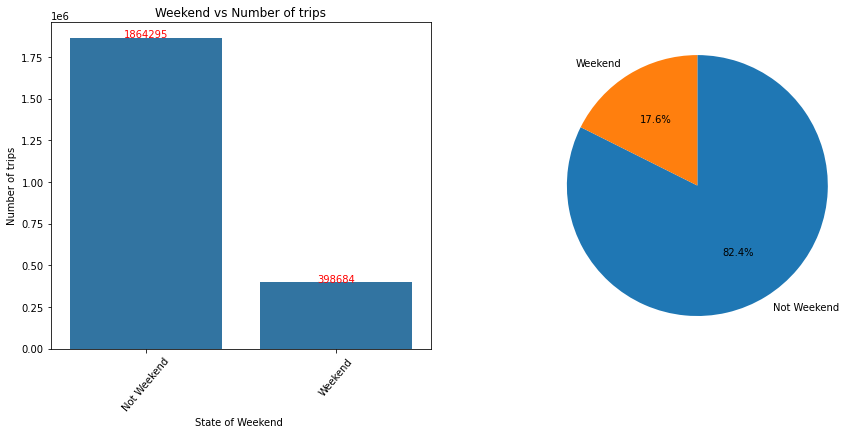

In [53]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
uni_categ_plot(col_name='Weekend',sort=False,var_count=2)
plt.xlabel('State of Weekend ');
plt.ylabel('Number of trips');
plt.title('Weekend vs Number of trips');
plt.subplot(1,2,2)
plt.pie(x=df_bikes['Weekend'].value_counts(),labels=df_bikes['Weekend'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- As mention before that weekend days affected a lot the number of trips , So the company may have to increase the deals during these 2 days and make a great offers and concentrate more to make these 2 days an interesting one for the employees.

- It can make an offers when you choose an end station that contain any entertaining places such cinema,park,stadium and so on. This will encourage the users to make more trips during the weekend days.

#### What is the average trip time consumed by the user through the whole year?

In [10]:
slots=['0-1 hour','1-2 hour','2-4 hour','4-8 hour','8-12 hour','12-16 hour','16-20 hour','20-24 hour']
slots_counts=[]
for i in range(len(slots)):
    if i < 5:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0]) ) & (df_bikes.duration_hrs<int(slots[i][2])) ].count()[0])
    elif i==5:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0]) ) & (df_bikes.duration_hrs<int(slots[i][3:5])) ].count()[0])
    else:
        slots_counts.append(df_bikes[(df_bikes.duration_hrs>int(slots[i][0:2]) ) & (df_bikes.duration_hrs<int(slots[i][3:5])) ].count()[0])
 

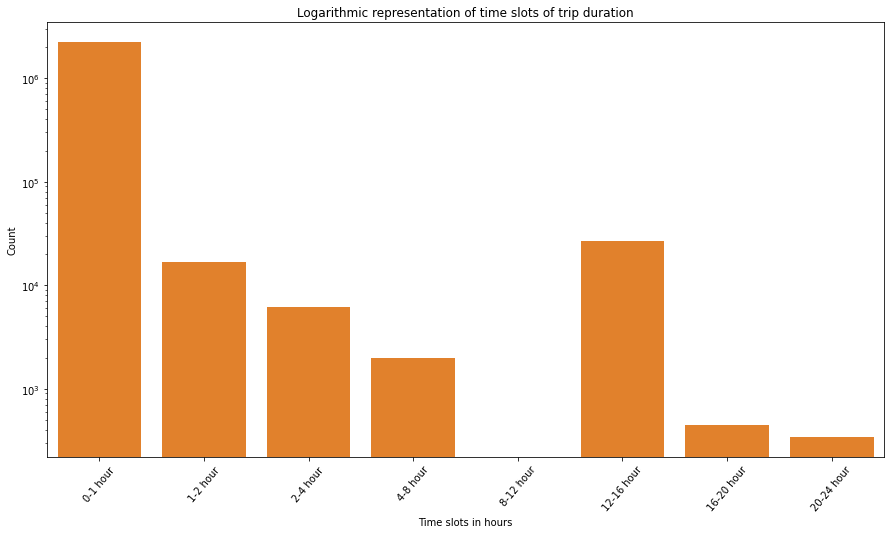

In [12]:
base_color=sns.color_palette()[1]
plt.figure(figsize=[15,8])
sns.barplot(x=slots,y=slots_counts,color=base_color)
plt.xticks(rotation=50);
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Time slots in hours')
plt.title('Logarithmic representation of time slots of trip duration');

- As shown in the plot most trips not exceeds 1 hour and literally most of them are just minutes only , The only insight is that the most users spend little time in cycling

#### What are the stations that usually the users use through the year as start or end station?

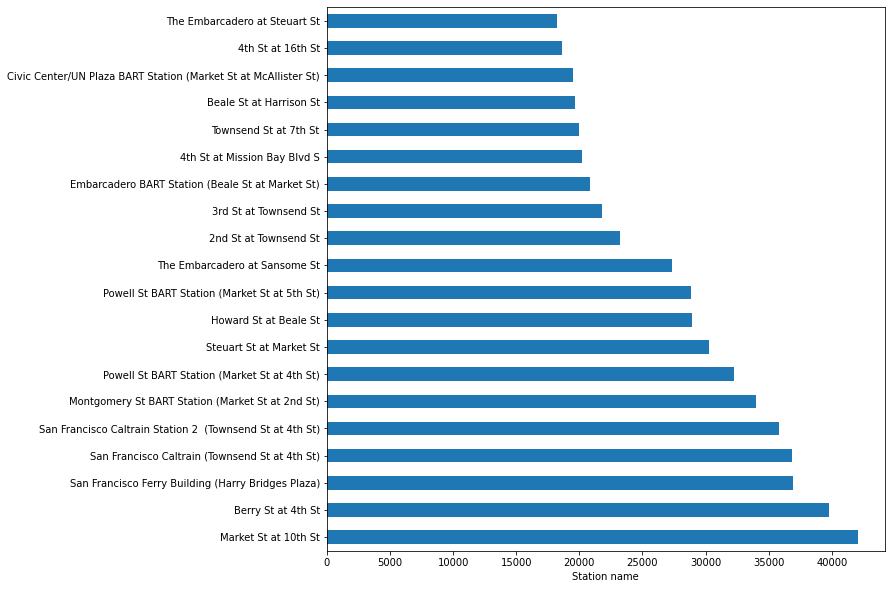

In [33]:
df_bikes.start_station_name.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh',figsize = (10,10)).set(xlabel = 'Station name'); 

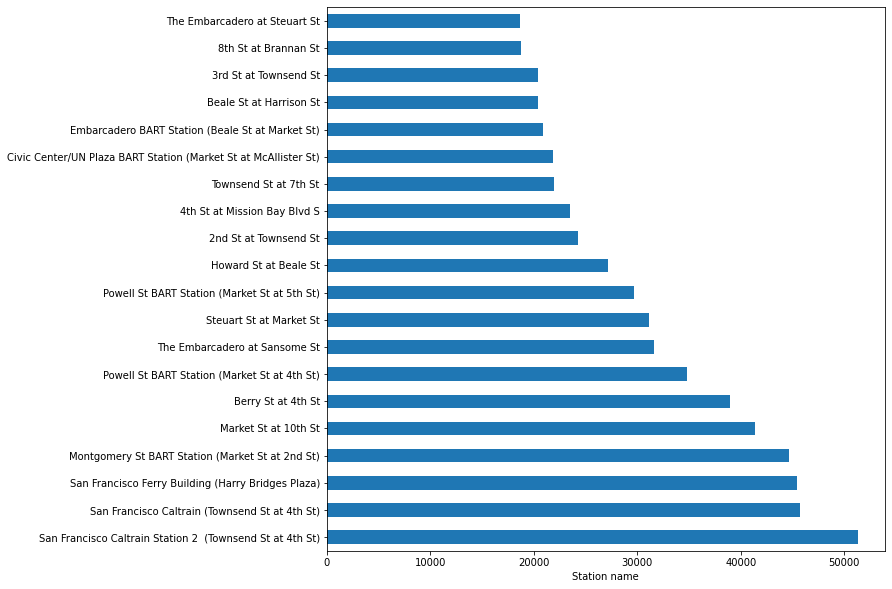

In [34]:
df_bikes['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh',figsize = (10,10)).set(xlabel = 'Station name');

- The two plots above indicates that there are 5 or 6 stations only that dominating the start and end stations. 
- This leads us to important fact that these station can be double-sided coin , Those stations can be a challenge for the company and leads them to give the station more attention and take care of its constant maintenance and add to it some luxuries such as chargers for mobiles and Wi-Fi and so on.
- Also it can be a nightmare if the company considered them as their comfort zone and neglect its maintenance depending that users needed those stations.


#### What are the distribution of the user types?

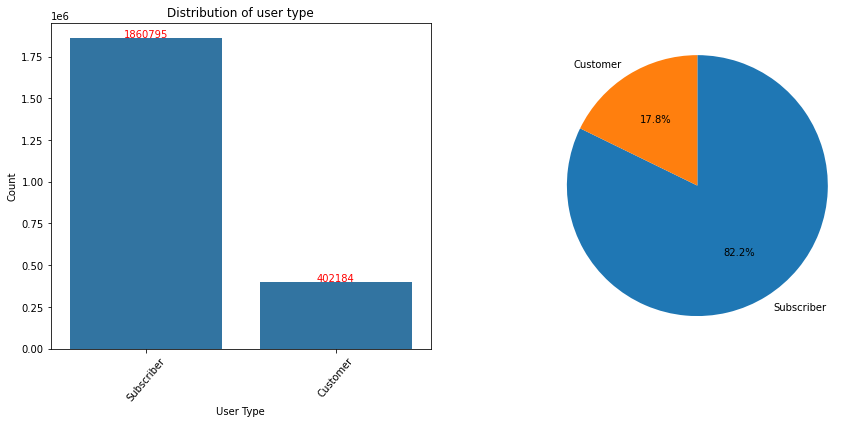

In [36]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
uni_categ_plot(col_name='user_type',sort=False,var_count=2)
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Distribution of user type');
plt.subplot(1,2,2)
plt.pie(x=df_bikes['user_type'].value_counts(),labels=df_bikes['user_type'].value_counts().index,startangle = 90, counterclock = False,autopct='%.1f%%');

- There is no need to say the about 83% of the users are already subscribers which is a very big number , But also this number is tricky , a lot of huge companies that neither any of us just imagine that they will collapse as they done , so this number should encourage the company to improve more and to look ahead for more and more, Let's say why not in 2021 the precentage will increase to 90%?

#### How the user type affected the duration of trip ?

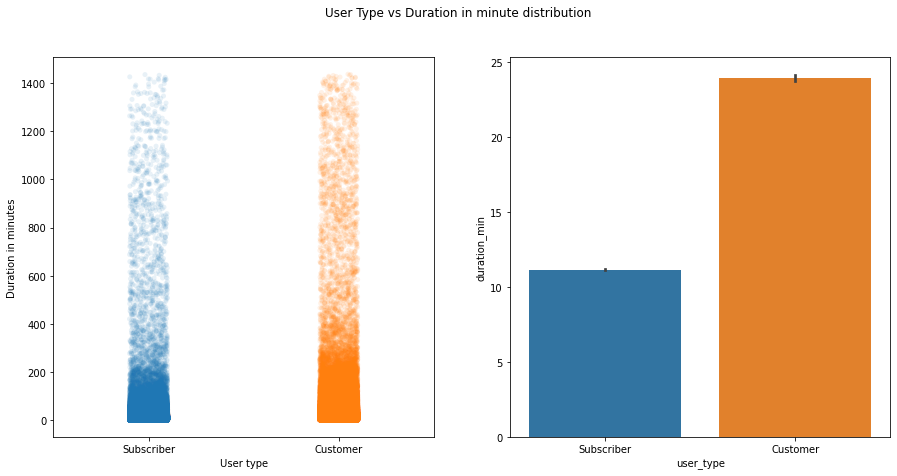

In [13]:
plt.figure(figsize=[15,7])
plt.suptitle('User Type vs Duration in minute distribution')
plt.subplot(1,2,1)
sns.stripplot(x=df_bikes["user_type"] , y=df_bikes['duration_min'] , jitter=True , alpha = 0.1)
plt.xlabel('User type')
plt.ylabel('Duration in minutes')
plt.subplot(1,2,2)
sns.barplot(x=df_bikes["user_type"] , y=df_bikes['duration_min'] );

- Surprisingly the customers tend to take a longer trips than the regular subscribers by a huge margin, But also it can be explained that the subscribers subscribe for a specific reason mostly for work trip ,hence specific path which is significantly a short distance trip , in contrast the customers mostly uses the bikes suddenly or without a week before plan and for recreational trip which may be a longer trip.


#### How the season,period of day and the state of weekend affected the duration of the trip?

In [14]:
def categ_num_plot(categ_col,numer_col):
    sns.stripplot(x=df_bikes.loc[:,categ_col] , y=df_bikes.loc[:,numer_col] , jitter=True , alpha = 0.3)

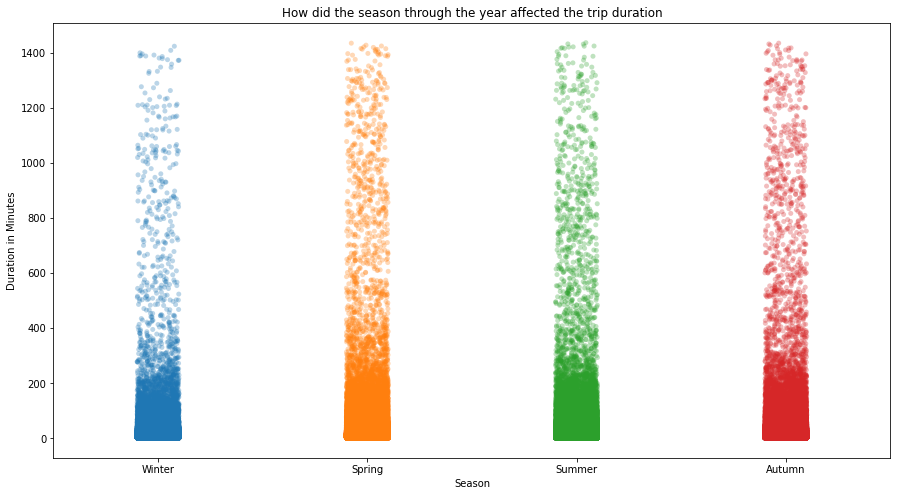

In [27]:
plt.figure(figsize=[15,8])
categ_num_plot(categ_col='Season',numer_col='duration_min')
plt.title('How did the season through the year affected the trip duration')
plt.xlabel('Season')
plt.ylabel('Duration in Minutes')
plt.show()

- The plot shows that Spring and Autumn has the most highly duration trips among Summer and Winter.
- Although Summer is not that way behind both of them.
- Winter due to the weather has the least number of trips of high duration time.

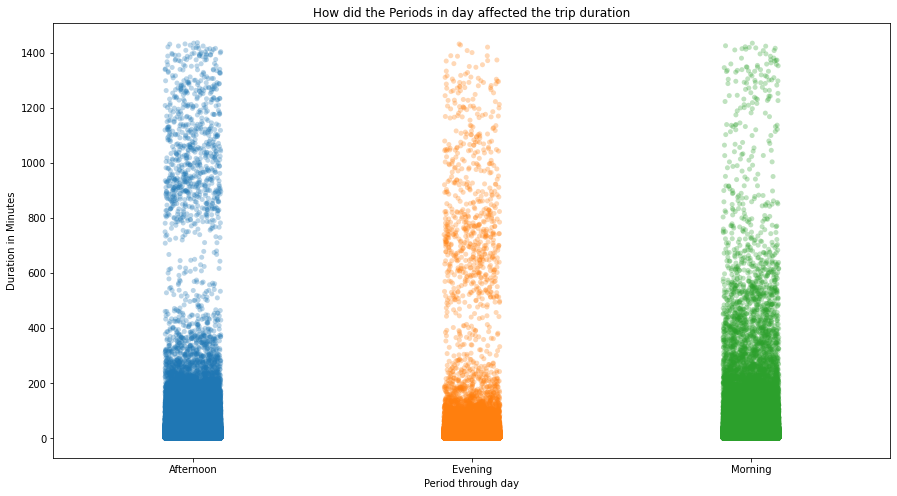

In [28]:
plt.figure(figsize=[15,8])
categ_num_plot(categ_col='Period in day',numer_col='duration_min')
plt.xlabel('Period through day')
plt.ylabel('Duration in Minutes')
plt.title('How did the Periods in day affected the trip duration')
plt.show()

- Surprisingly the number of highly duration trips is high even the number of trips in evening is very low.
- Afternoon has the most trips with high duration time in contast the Morning has the lowest one.

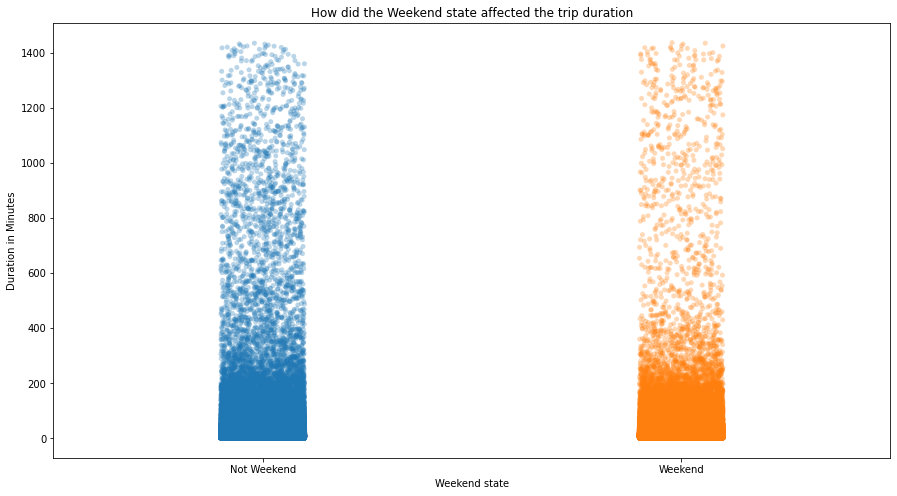

In [30]:
plt.figure(figsize=[15,8])
categ_num_plot(categ_col='Weekend',numer_col='duration_min')
plt.xlabel('Weekend state')
plt.ylabel('Duration in Minutes')
plt.title('How did the Weekend state affected the trip duration')
plt.show()

- The normal days has slighly more number of trips of high trip duration

#### What is the relation between weekend and user type ?

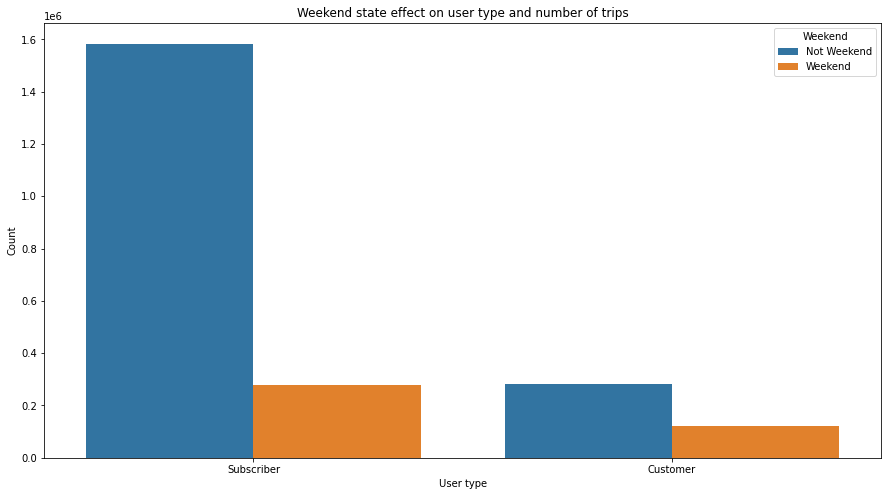

In [19]:
plt.figure(figsize=[15,8])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Weekend'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Weekend state effect on user type and number of trips')
plt.show()

- This plot is the most important one in my opinion , it illustrates the reason the number of trips duration differs from the customer and subscriber.

- If you take a look in the subscriber , you will see a huge difference between number of trips in the non-weekend days which mostly are work/college/school (Planned) trips and the weekend days.
- Quite the opposite , the weekend state didn't have that effect on the number of trips which indicates that most trips of customers are non planned one which illustrates the reason behind the high duration trips that exists a lot in the customer plot previously.

#### What is the relation between user type and (season and period of day)?


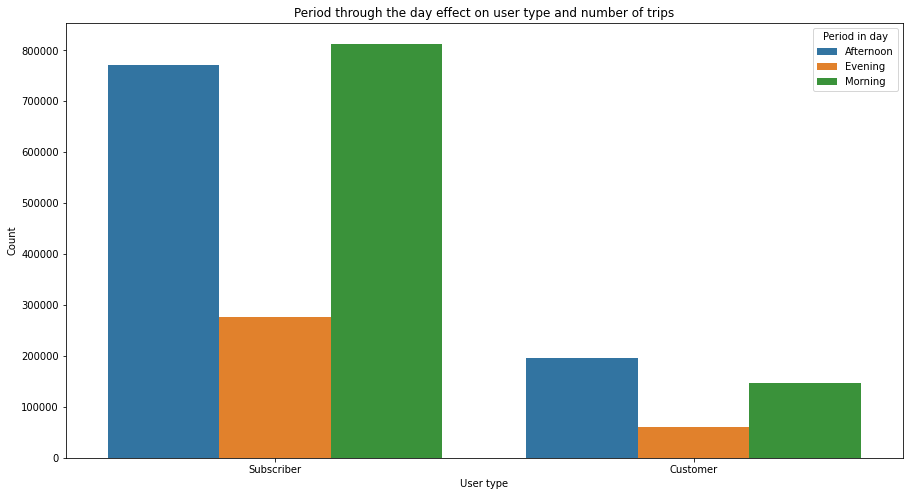

In [20]:
plt.figure(figsize=[15,8])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Period in day'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Period through the day effect on user type and number of trips')
plt.show()

- There is no such difference here except that the subscriber morning trips are higher in precentage than that of customer one , May be  work trips play a role in this insight.

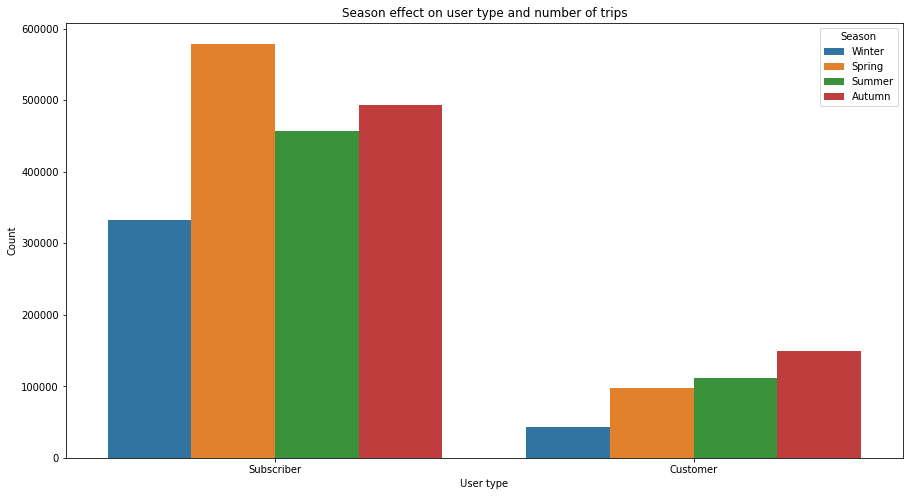

In [21]:
plt.figure(figsize=[15,8])
sns.countplot(x=df_bikes["user_type"] , hue=df_bikes['Season'])
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Season effect on user type and number of trips')
plt.show()

- Also there is no huge difference except that spring is not considered the most season in number of trips in the customer trips.

#### How the user type , time analysis and duration of trip can be related?

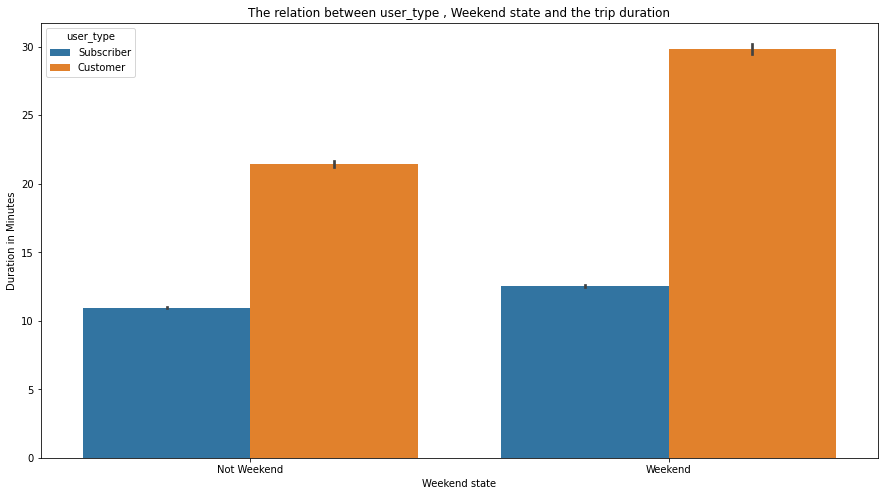

In [22]:
plt.figure(figsize=[15,8])
sns.barplot(x=df_bikes["Weekend"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Weekend state')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Weekend state and the trip duration')
plt.show()

- This plot shows as a great insight that whether the day is weekend or not the subscriber trip duration not changed a lot , while for customer trips duration it is hugely increased.

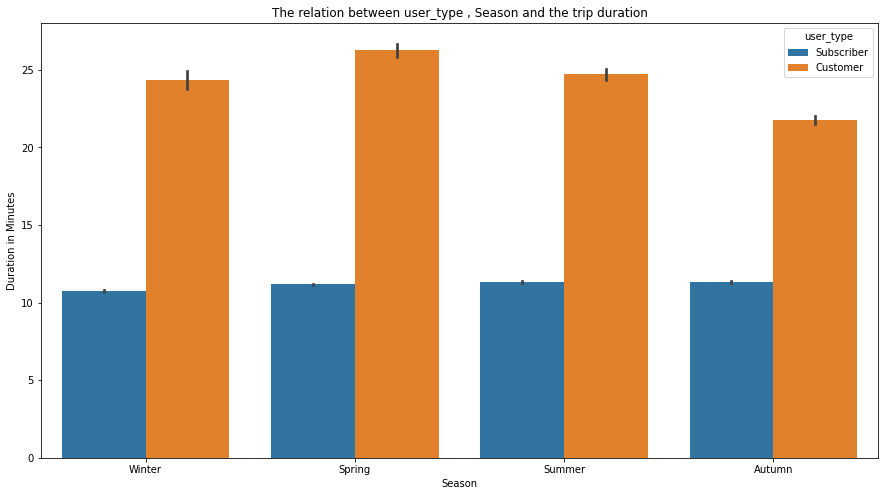

In [24]:
plt.figure(figsize=[15,8])
sns.barplot(x=df_bikes["Season"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Season')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Season and the trip duration')
plt.show()

- There is no change at all here , this means that seasons doesn't affect both customer and subscriber trip duration.

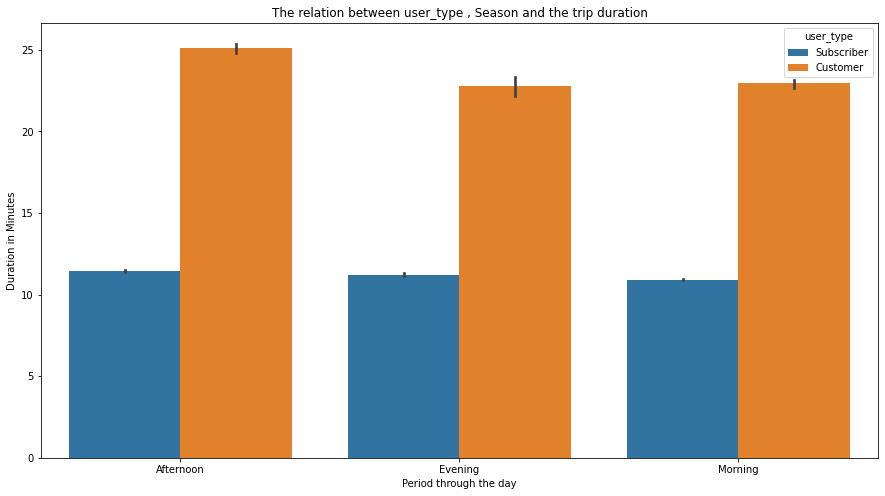

In [26]:
plt.figure(figsize=[15,8])
sns.barplot(x=df_bikes["Period in day"] , y=df_bikes['duration_min'],hue=df_bikes['user_type'] )
plt.xlabel('Period through the day')
plt.ylabel('Duration in Minutes')
plt.title('The relation between user_type , Season and the trip duration')
plt.show()

- Also , There is no change at all here , this means that day period doesn't affect both customer and subscriber trip duration.

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input